In [2]:
import time
import calendar
import codecs
import datetime
import json
import sys
import gzip
import string
import glob
import re
import os
import numpy as np
from os import listdir
from os.path import isfile, join
import csv
import networkx as nx
from demjson import decode
import pandas as pd
import random
from collections import defaultdict
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from itertools import chain
import math
import matplotlib.pyplot as plt
import twittergraph as tg

In [3]:
graph_SA = tg.LoadTwitterGraph('/Users/Tate/Downloads/', 0, sample_amount = None)

Loaded 181416 tweets


In [4]:
graph_K = tg.LoadTwitterGraph('/Users/Tate/Downloads/', 1, sample_amount = None)

Loaded 1135842 tweets


In [5]:
graph_N = tg.LoadTwitterGraph('/Users/Tate/Downloads/', 2, sample_amount = 0.2)

Loaded 548708 tweets


In [6]:
SA_info = nx.info(graph_SA)
print("South Africa Info", SA_info)
K_info = nx.info(graph_K)
print("Kenya Info", K_info)
N_info = nx.info(graph_N)
print("Nigeria Info", N_info)

South Africa Info Name: 
Type: Graph
Number of nodes: 26669
Number of edges: 173629
Average degree:  13.0210
Kenya Info Name: 
Type: Graph
Number of nodes: 60249
Number of edges: 701867
Average degree:  23.2989
Nigeria Info Name: 
Type: Graph
Number of nodes: 92768
Number of edges: 533369
Average degree:  11.4990


In [7]:
SA_cc = nx.number_connected_components(graph_SA)
print("South Africa CC", SA_cc)
K_cc = nx.number_connected_components(graph_K)
print("Kenya CC", K_cc)
N_cc = nx.number_connected_components(graph_N)
print("Nigeria CC", N_cc)


South Africa CC 3
Kenya CC 1
Nigeria CC 2467


In [8]:
deg = list(nx.degree(graph_SA).values())
freq = []
for x in deg:
    freq.append(deg.count(x))

In [9]:
import numpy
logdeg = []
for x in deg:
    logdeg.append(numpy.log(x))

#print(logdeg)

logfreq = []
for y in freq:
    logfreq.append(numpy.log(y))

#print(logfreq)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


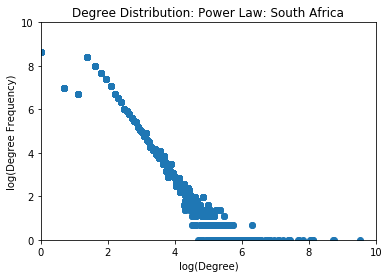

In [11]:
plt.title('Degree Distribution: Power Law: South Africa')
plt.scatter(logdeg,logfreq)
#plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.ylabel('log(Degree Frequency)')
plt.xlabel('log(Degree)')
plt.show()

In [12]:
deg = list(nx.degree(graph_K).values())
freq = []
for x in deg:
    freq.append(deg.count(x))

In [13]:
import numpy
logdeg = []
for x in deg:
    logdeg.append(numpy.log(x))

#print(logdeg)

logfreq = []
for y in freq:
    logfreq.append(numpy.log(y))

#print(logfreq)

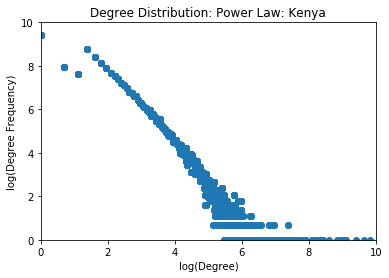

In [14]:
plt.title('Degree Distribution: Power Law: Kenya')
plt.scatter(logdeg,logfreq)
#plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.ylabel('log(Degree Frequency)')
plt.xlabel('log(Degree)')
plt.show()

In [15]:
deg = list(nx.degree(graph_N).values())
freq = []
for x in deg:
    freq.append(deg.count(x))

In [16]:
import numpy
logdeg = []
for x in deg:
    logdeg.append(numpy.log(x))

#print(logdeg)

logfreq = []
for y in freq:
    logfreq.append(numpy.log(y))

#print(logfreq)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


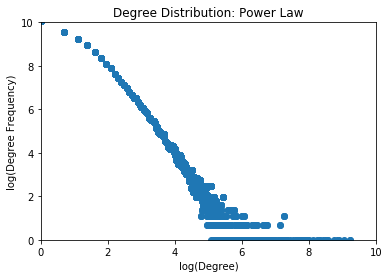

In [17]:
plt.title('Degree Distribution: Power Law')
plt.scatter(logdeg,logfreq)
#plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.ylabel('log(Degree Frequency)')
plt.xlabel('log(Degree)')
plt.show()